   Income   Age     Rooms  Bedrooms  Population  Occupancy  Latitude  \
0  8.3252  41.0  6.984127  1.023810       322.0   2.555556     37.88   
1  8.3014  21.0  6.238137  0.971880      2401.0   2.109842     37.86   
2  7.2574  52.0  8.288136  1.073446       496.0   2.802260     37.85   
3  5.6431  52.0  5.817352  1.073059       558.0   2.547945     37.85   
4  3.8462  52.0  6.281853  1.081081       565.0   2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
(20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Income      20640 non-null  float64
 1   Age         20640 non-null  float64
 2   Rooms       20640 non-null  float64
 3   Bedrooms    20640 non-null  float64
 4   Population  20640 non-null  float64
 5   Occupancy   20640 non-nu

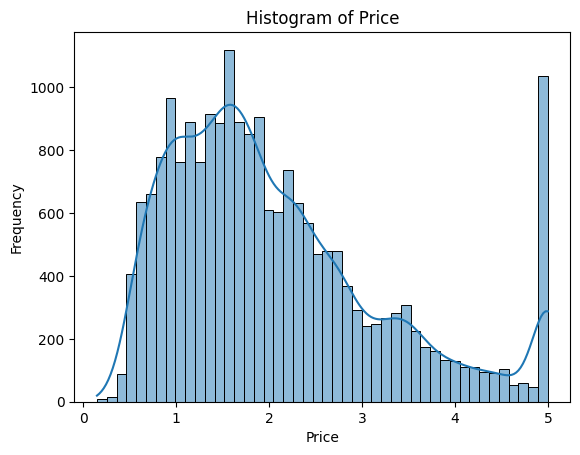

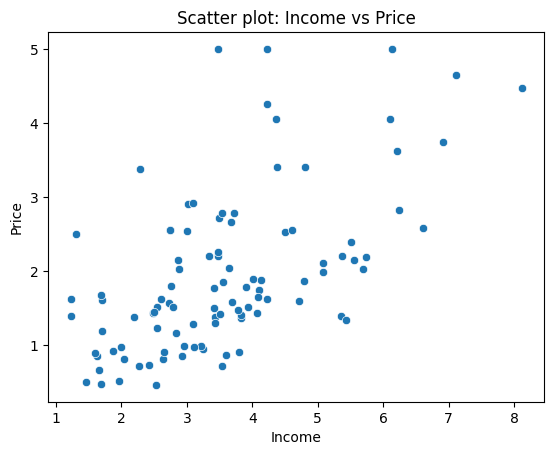

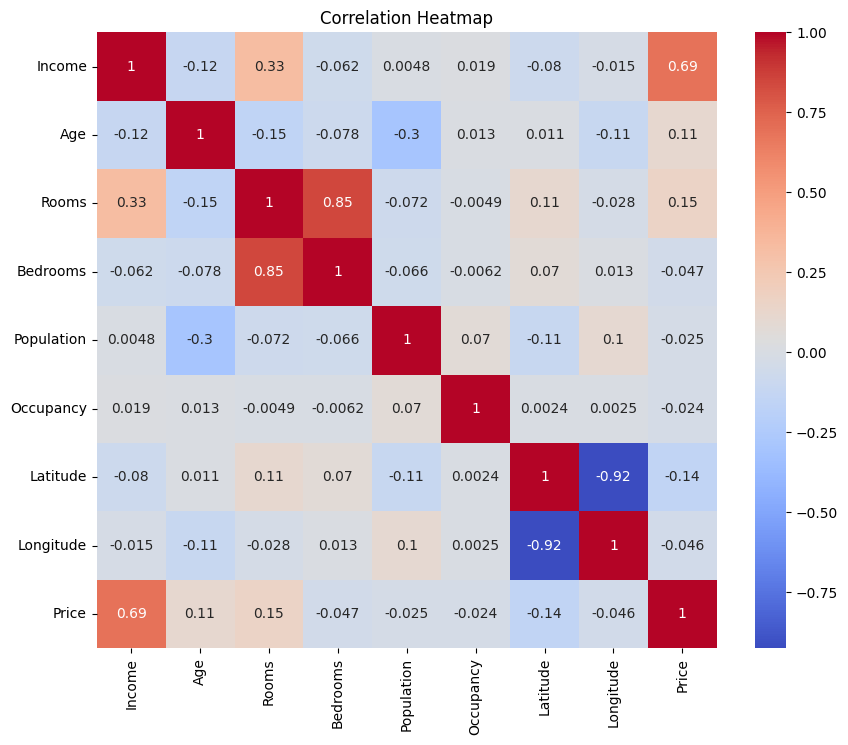

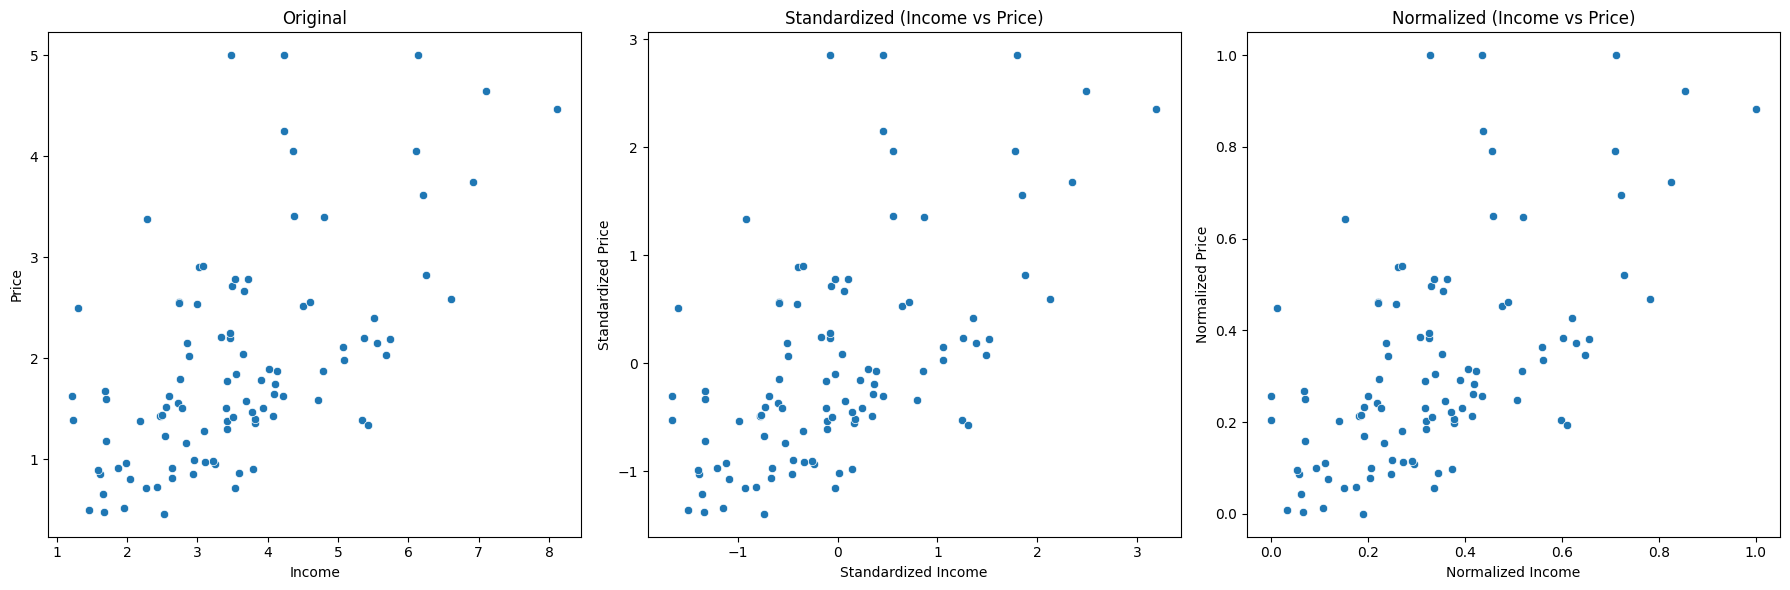

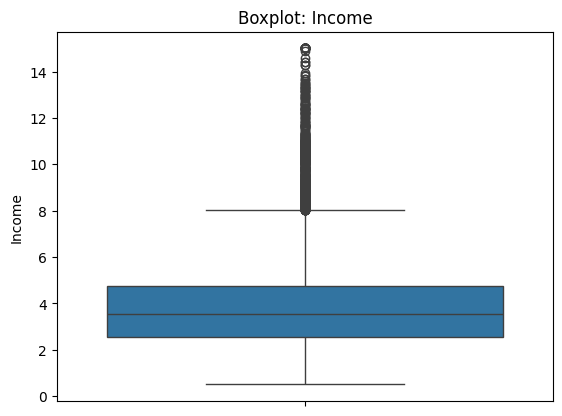

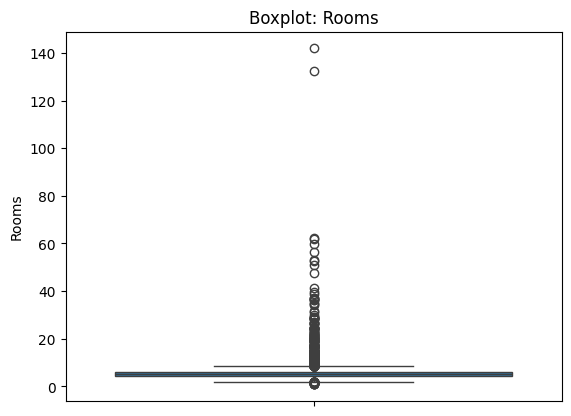

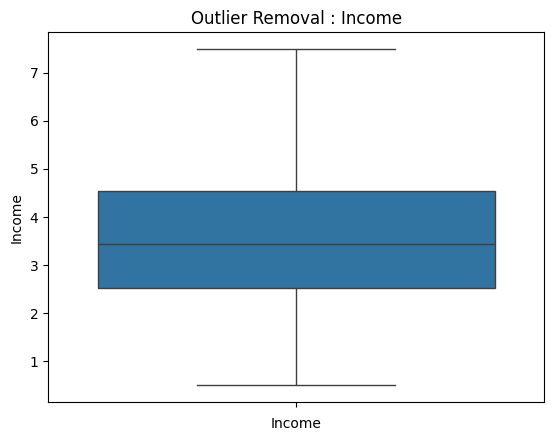

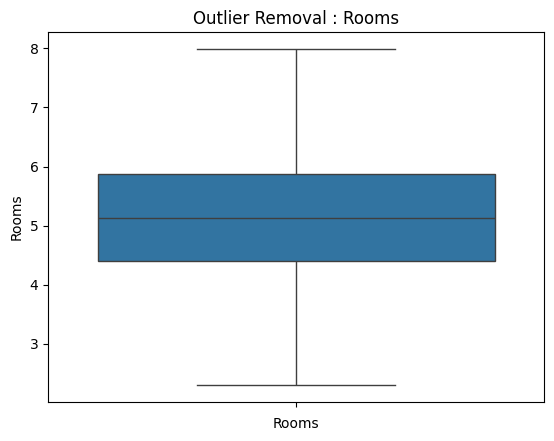


Random Split:

Train set distribution:
 Price
5.00001    0.023092
1.37500    0.005936
1.12500    0.005349
1.62500    0.005153
1.87500    0.004566
             ...   
1.30300    0.000065
2.56600    0.000065
3.60900    0.000065
2.62200    0.000065
2.42400    0.000065
Name: proportion, Length: 3512, dtype: float64

Test set distribution:
 Price
5.00001    0.022176
1.62500    0.005740
2.25000    0.005479
1.37500    0.004435
0.87500    0.004174
             ...   
3.26100    0.000261
0.62900    0.000261
0.75600    0.000261
1.18000    0.000261
1.87800    0.000261
Name: proportion, Length: 2108, dtype: float64

Startified Split:

Train set distribution:
 Price
5.00001    0.022244
1.37500    0.005740
1.62500    0.004827
1.12500    0.004631
1.87500    0.004175
             ...   
0.49200    0.000065
0.99900    0.000065
3.43800    0.000065
3.36300    0.000065
0.30000    0.000065
Name: proportion, Length: 3533, dtype: float64

Test set distribution:
 Price
5.00001    0.025567
1.62500    0.007044

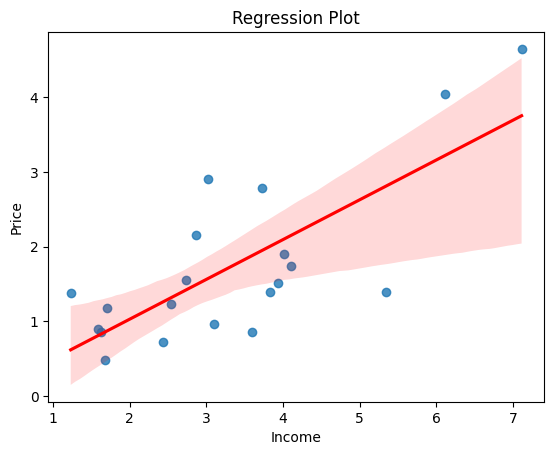


Linear Regression Model Evaluation:
Mean Absolute Error: 0.6336073660358748
Mean Squared Error: 0.5451128975020885
R-Squared: 0.5250290088338518


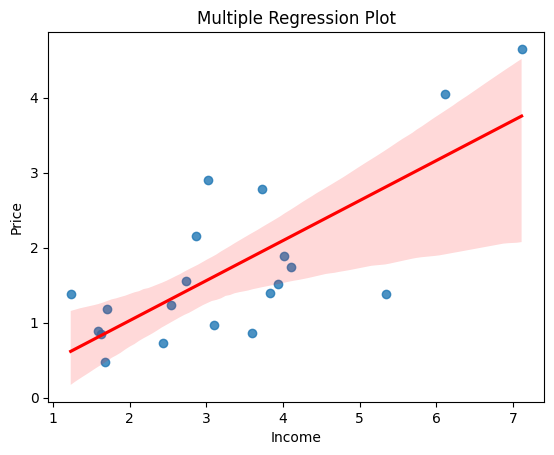


Multiple Regression Model Evaluation:
Mean Absolute Error: 0.5283317061380408
Mean Squared Error: 0.41535432223345464
R-Squared: 0.6380910174380678


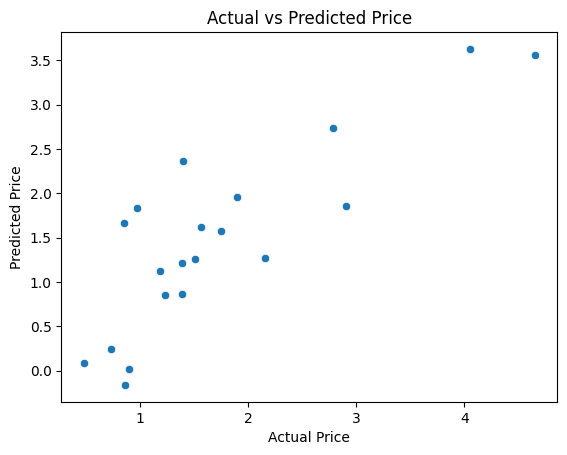

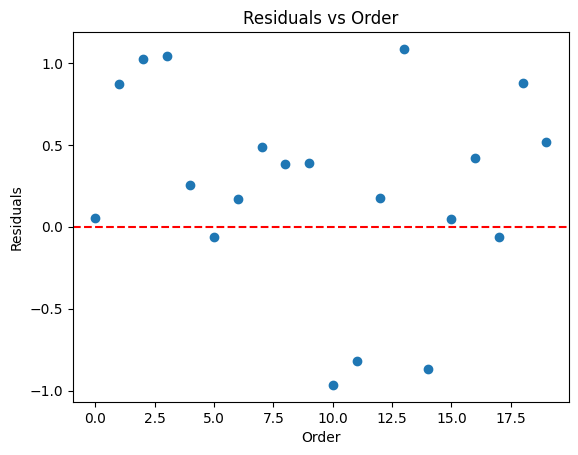

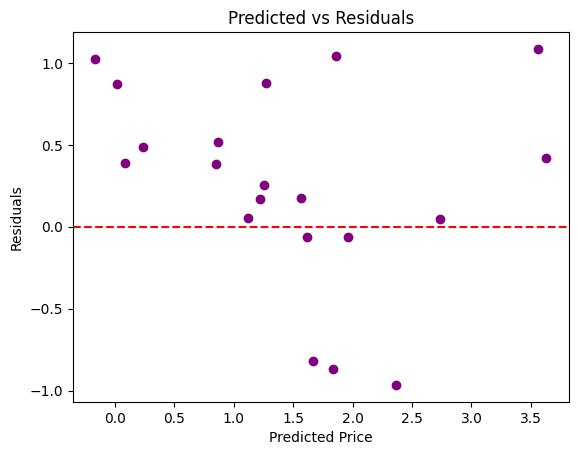

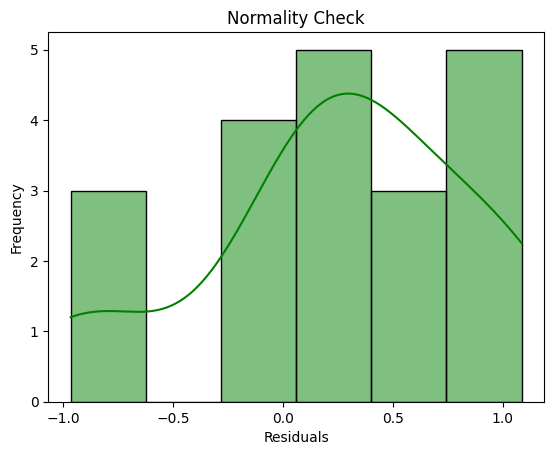


Residuals & Error Metrics:
Mean Absolute Error: 0.5283317061380408
Mean Squared Error: 0.41535432223345464
R-Squared: 0.6380910174380678


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Load & Manipulate Data

df = pd.read_csv("/content/california_housing.csv")

pd.set_option('display.max_columns', None)

print(df.head(5))

print(df.shape)

print(df.info())

print("\nMissing Values:")

print(df.isnull().sum())

print("\nDuplicate:")

print(df.duplicated().sum())


# Exploratory Data Analysis (EDA)

print(df.describe())

print("\nMedian:")

print(df.median())

df_small = df.sample(100, random_state=42)

# Visualizations

# Histogram of Price

sns.histplot(x=df['Price'],kde=True)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Price")
plt.show()

# Scatter plot: Income vs Price

sns.scatterplot(x=df_small['Income'],y=df_small['Price'])
plt.xlabel("Income")
plt.ylabel("Price")
plt.title("Scatter plot: Income vs Price")
plt.show()

# Correlation heatmap of all features

corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Preprocessing & Outlier Detection

# Scale numeric features (StandardScaler or MinMaxScaler)
# Selecting Income and Price columns for scaling demonstration

data_for_scaling = df_small[['Income', 'Price']]

scaler = StandardScaler()
standardized = scaler.fit_transform(data_for_scaling)

# Normalization example (using min-max scaling)

minmax_scaler = MinMaxScaler()
normalized = minmax_scaler.fit_transform(data_for_scaling)

fig, axs = plt.subplots(1, 3, figsize=(18,6))

# Original
sns.scatterplot(x=data_for_scaling["Income"], y=data_for_scaling["Price"], ax=axs[0])
axs[0].set_title("Original")
axs[0].set_xlabel("Income")
axs[0].set_ylabel("Price")


# Standardized
sns.scatterplot(x=standardized[:,0], y=standardized[:,1], ax=axs[1])
axs[1].set_title("Standardized (Income vs Price)")
axs[1].set_xlabel("Standardized Income")
axs[1].set_ylabel("Standardized Price")

# Normalized
sns.scatterplot(x=normalized[:,0], y=normalized[:,1], ax=axs[2])
axs[2].set_title("Normalized (Income vs Price)")
axs[2].set_xlabel("Normalized Income")
axs[2].set_ylabel("Normalized Price")

plt.tight_layout()
plt.show()

# Outlier detection

# Boxplot for Income

sns.boxplot(y=df['Income'])
plt.ylabel("Income")
plt.title("Boxplot: Income")
plt.show()

# Boxplot for Rooms

sns.boxplot(y=df['Rooms'])
plt.ylabel("Rooms")
plt.title("Boxplot: Rooms")
plt.show()

# Removing Outliers

df = df[df['Income'] < 7.5]

df = df[(df['Rooms'] < 8) & (df['Rooms'] > 2.3)]


sns.boxplot(y=df['Income'])
plt.xlabel('Income')
plt.title('Outlier Removal : Income')
plt.show()

sns.boxplot(y=df['Rooms'])
plt.xlabel('Rooms')
plt.title('Outlier Removal : Rooms')
plt.show()

# Train Test Split

X1 = df[['Income']]
y1 = df['Price']

# Random Split by Income

X_train1, X_test1, y_train1, y_test1 = train_test_split( X1, y1, test_size=0.2, random_state=42)


# Startified Split Based on Income
# Create income bins for stratification

df['income'] = pd.cut(df['Income'], bins=10, labels=False)

X2 = df[['Income', 'Rooms']]
y2 = df['Price']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, stratify=df['income'], random_state=42)


# Compare Distribution Between Random Split and Startified Split
print("\nRandom Split:")
print("\nTrain set distribution:\n",y_train1.value_counts(normalize=True))
print("\nTest set distribution:\n",y_test1.value_counts(normalize=True))

print("\nStartified Split:")
print("\nTrain set distribution:\n",y_train2.value_counts(normalize=True))
print("\nTest set distribution:\n",y_test2.value_counts(normalize=True))

# Linear Regression

X = df_small[['Income']]
y = df_small['Price']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)

y_predicted = model.predict(X_test)

# Regression Plot

sns.regplot(x=X_test['Income'],y=y_test,line_kws={'color':'red'})
plt.xlabel("Income")
plt.ylabel("Price")
plt.title("Regression Plot")
plt.show()

print("\nLinear Regression Model Evaluation:")
print('Mean Absolute Error:', mean_absolute_error(y_test,y_predicted))
print('Mean Squared Error:', mean_squared_error(y_test, y_predicted))
print('R-Squared:', r2_score(y_test,y_predicted))

# Multiple Regression Predicting Price using all features

a = df_small[['Income','Age','Rooms','Bedrooms','Population','Occupancy','Latitude','Longitude']]
b = df_small['Price']

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

model = LinearRegression().fit(a_train, b_train)

b_predicted = model.predict(a_test)

# Multiple Regression Plot

sns.regplot(x=a_test['Income'],y=b_test,line_kws={'color':'red'})
plt.xlabel("Income")
plt.ylabel("Price")
plt.title("Multiple Regression Plot")
plt.show()

print("\nMultiple Regression Model Evaluation:")
print('Mean Absolute Error:', mean_absolute_error(b_test, b_predicted))
print('Mean Squared Error:', mean_squared_error(b_test, b_predicted))
print('R-Squared:', r2_score(b_test, b_predicted))

# Residuals

Residuals = b_test - b_predicted

# Check Assumptions

#	Linearity: Plot predicted vs actual

sns.scatterplot(x=b_test,y=b_predicted)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

#	Independence: Residuals vs order.

plt.plot(Residuals.reset_index(drop=True), marker='o', linestyle='')
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Order")
plt.ylabel("Residuals")
plt.title("Residuals vs Order")
plt.show()

# Homoscedasticity: Predicted vs residuals

plt.scatter(b_predicted, Residuals, color="purple")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Predicted vs Residuals")
plt.show()

#	Normality: Histogram/Q-Q plot of residuals

sns.histplot(Residuals, kde=True, color="green")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Normality Check")
plt.show()

# Error Metrics

print("\nResiduals & Error Metrics:")
print('Mean Absolute Error:', mean_absolute_error(b_test, b_predicted))
print('Mean Squared Error:', mean_squared_error(b_test, b_predicted))
print('R-Squared:', r2_score(b_test, b_predicted))

# Which variables impact house price the most?
# Did assumptions hold true?
# Which model was better?
# Are errors acceptable?
